<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/temp_hosting/equal_weight_index_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  10 of 10 completed


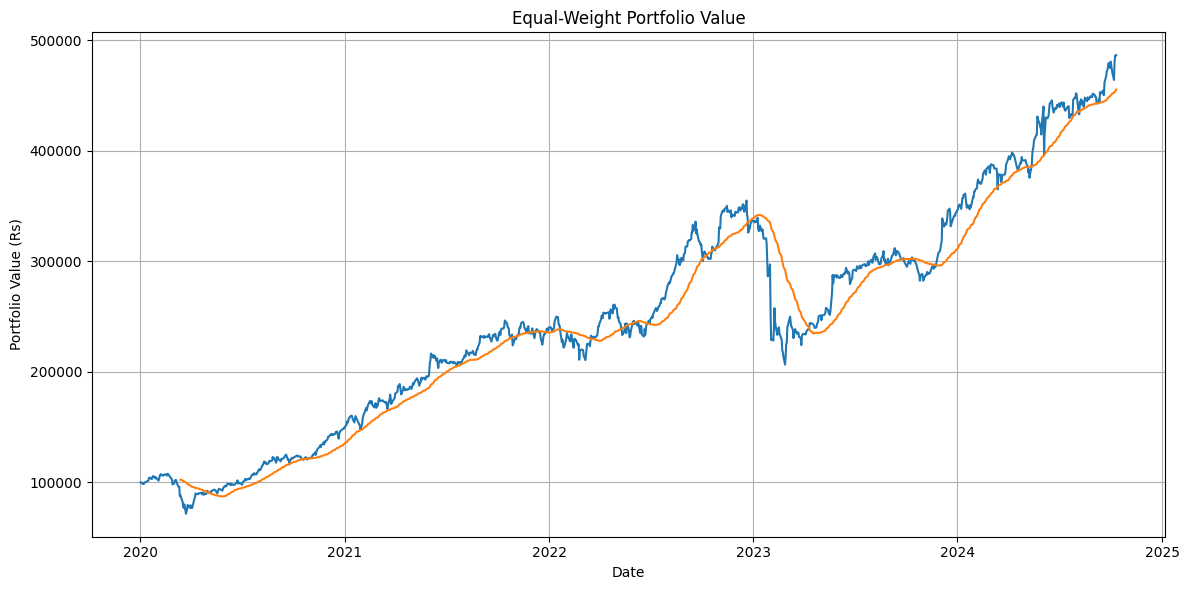

Final Portfolio Value: Rs. 486623.86
Total Return: 386.62%


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# List of stocks
stocks = ["DIVISLAB.NS", "TORNTPHARM.NS", "ADANIENT.NS", "HDFCLIFE.NS", "NAUKRI.NS",
          "HCLTECH.NS", "M&M.NS", "BOSCHLTD.NS", "SIEMENS.NS","BHARTIARTL.NS"]

# Set the start date to June 2, 2024 (or the nearest trading day)
start_date = "2020-01-02"
end_date = datetime.now().strftime("%Y-%m-%d")

# Download data
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change()

# Calculate portfolio value
initial_investment = 100000  # Rs. 1,00,000
num_stocks = len(stocks)
investment_per_stock = initial_investment / num_stocks

# Calculate the number of shares for each stock
shares = investment_per_stock / data.iloc[0]

# Calculate daily portfolio value
portfolio_value = (shares * data).sum(axis=1)

# Plot the portfolio value
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value.index, portfolio_value.values)
plt.plot(portfolio_value.index, portfolio_value.rolling(window=50).mean())
plt.title('Equal-Weight Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (Rs)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print final portfolio value
print(f"Final Portfolio Value: Rs. {portfolio_value.iloc[-1]:.2f}")
print(f"Total Return: {((portfolio_value.iloc[-1] / initial_investment) - 1) * 100:.2f}%")